In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [2]:
import numpy as np
import os
os.environ['CONDA_DEFAULT_ENV']

'K2phot'

See info [here](https://archive.stsci.edu/prepds/k2sff/).

FITS file containing extracted lightcurves for all aperture sizes/shapes. 

* The first extension contains a binary FITS table with the time, corrected flux, raw flux, arclength distance, a flag indicating whether a thruster firing was occurring, and the cadence number for all observations, using the "best" aperture size/shape. 
* The next twenty extensions contain similar tables for every aperture size/shape. 
* The 22nd and 23rd extensions contain tables that define each circular and PSF aperture, respectively. The final extension contains the summed image of all the postage stamp frames.

In [3]:
from astropy.io import fits

fname='/home/jp/data/transit/c13/hlsp_k2sff_k2_lightcurve_247589423-c13_kepler_v1_llc.fits'
hdu=fits.open(fname)
for i,h in enumerate(hdu):
    print(i,type(h))

(0, <class 'astropy.io.fits.hdu.image.PrimaryHDU'>)
(1, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(2, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(3, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(4, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(5, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(6, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(7, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(8, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(9, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(10, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(11, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(12, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(13, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(14, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(15, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(16, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(17, <class 'astropy.io.fits.hdu.table.BinTableHDU'>)
(18, <class 'astropy.io.fits.hdu.table.

In [39]:
import numpy as np

ts={}
for i in np.arange(1,21,1):
    ts[i]=hdu[i].data
    #pl.plot()

In [46]:
ts[1].dtype

dtype((numpy.record, [('T', '>f8'), ('FRAW', '>f8'), ('FCOR', '>f8'), ('ARCLENGTH', '>f8'), ('MOVING', '>i2'), ('CADENCENO', '>i4')]))

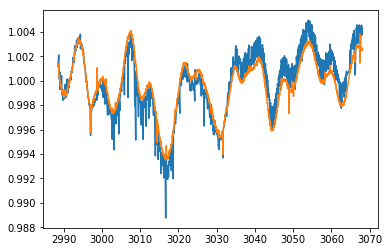

In [49]:
pl.plot(ts[1].T,ts[1].FRAW, ts[1].T,ts[1].FCOR)

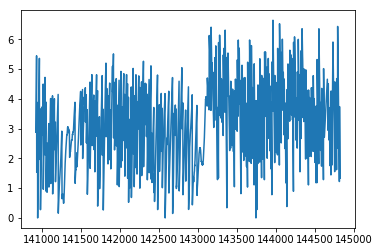

In [57]:
pl.plot(ts[1].T,ts[1].ARCLENGTH) 

In [4]:
for i in (22,23,24):
    print(hdu[i].data.shape)

(10, 11, 12)
(10, 11, 12)
(11, 12)


## Aperture 1

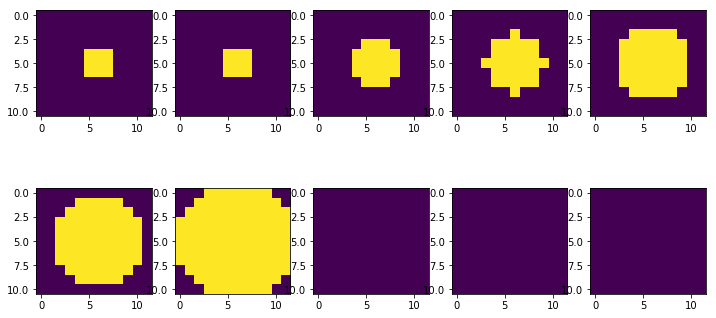

In [81]:
fig = pl.figure(figsize=(12,6))
for i in range(hdu[22].data.shape[0]):
    ax = pl.subplot(2,5,i+1)
    ax.imshow(hdu[22].data[i,:,:])
    #pl.tight_layout()

## Aperture 2

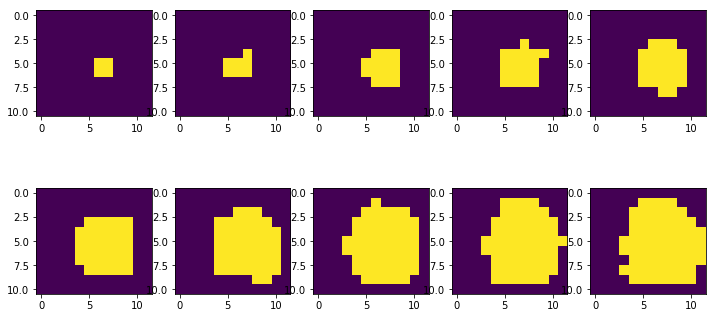

In [82]:
fig = pl.figure(figsize=(12,6))
for i in range(hdu[23].data.shape[0]):
    ax = pl.subplot(2,5,i+1)
    ax.imshow(hdu[23].data[i,:,:])
    #pl.tight_layout()

## Summed image
of all postage stamp frames

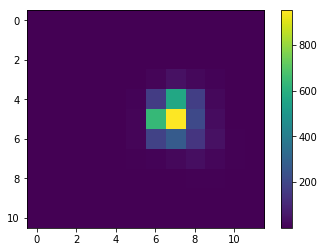

In [67]:
pl.imshow(hdu[24].data)
pl.colorbar(orientation='vertical')

In [66]:
img=hdu[24].data

img[5,7]

951.57430268551411

## Download lc data

ASCII text table containing time and corrected flux values for the default ("best") aperture.

In [5]:
import pandas as pd

campaign=str(13)
epic = '247589423'

part1='http://archive.stsci.edu/missions/hlsp/k2sff/c'
part2='00000/'
part3='/hlsp_k2sff_k2_lightcurve_'
part4='_kepler_v1_llc-default-aper.txt'

url=part1+campaign+'/'+epic[:4]+part2+epic[-5:]+part3+epic+'-c'+campaign+part4

## LS model

# QL

Quick look lightcurve reduced using a K2 data pipeline called [K2SFF](https://archive.stsci.edu/prepds/k2sff/) available online.

* [EPIC247589423](https://www.cfa.harvard.edu/~avanderb/k2c13/ep247589423.html)

## Corrected lightcurves from Vanderburg website

* [campaign 13](https://www.cfa.harvard.edu/~avanderb/k2c13/)

The advantage of this approach over using everest-pipeline is that direct download of corrected lightcurve is possible, making analysis relatively quickly. Take caution however that the pipeline might remove inherent variability in the dipper lightcurve so study how the pipeline exactly does the correction. 

## Download all lc data

FITS file containing extracted lightcurves for all aperture sizes/shapes. The first extension contains a binary FITS table with the time, corrected flux, raw flux, arclength distance, a flag indicating whether a thruster firing was occurring, and the cadence number for all observations, using the "best" aperture size/shape. The next twenty extensions contain similar tables for every aperture size/shape. The 22nd and 23rd extensions contain tables that define each circular and PSF aperture, respectively. The final extension contains the summed image of all the postage stamp frames.

In [6]:
import pandas as pd

campaign=str(13)
epic = '247589423'

part1='http://archive.stsci.edu/missions/hlsp/k2sff/c'
part2='00000/'
part3='/hlsp_k2sff_k2_lightcurve_'
part4='_kepler_v1_llc-default-aper.txt'

url=part1+campaign+'/'+epic[:4]+part2+epic[-5:]+part3+epic+'-c'+campaign+part4

#
df = pd.read_csv(url, sep=",", header=0, index_col=False)
df.head()

,BJD - 2454833,Corrected Flux
0,2988.521044,1.001424
1,2988.541476,1.001325
2,2988.561909,1.001204
3,2988.582341,1.001296
4,2988.602773,1.001319


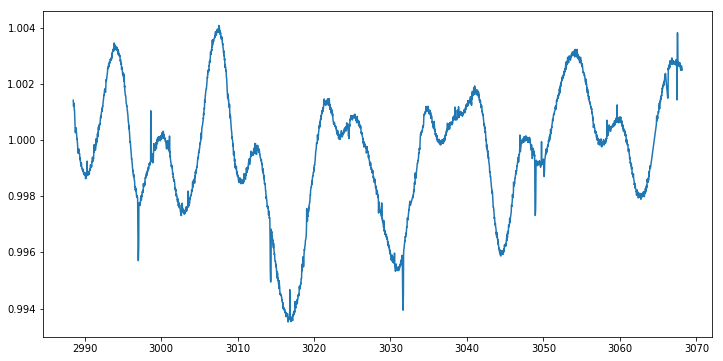

In [7]:
import matplotlib.pyplot as pl
%matplotlib inline

fig,ax=pl.subplots(1,1,figsize=(12,6))
ax.plot(df[df.columns[0]], df[df.columns[1]])

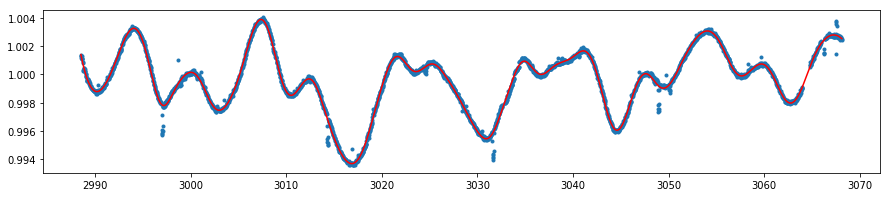

In [8]:
#fit spline

t,f=df['BJD - 2454833'], df[' Corrected Flux']

from scipy.interpolate import Rbf
rbfi = Rbf(t, f, function='quintic', smooth=100)

fig, ax = pl.subplots(1,1,figsize=(15,3))
ax.plot(t, f, '.')
ax.plot(t, rbfi(t), 'r-')

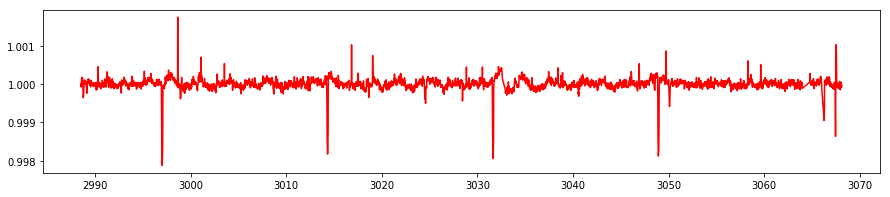

In [9]:
fig, ax = pl.subplots(1,1,figsize=(15,3))
f_d=f/rbfi(t)
ax.plot(t, f_d, 'r-')

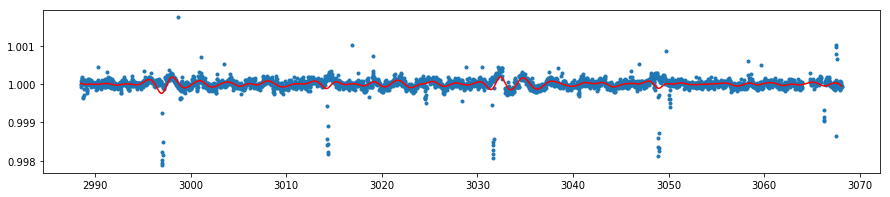

In [10]:
from scipy.interpolate import Rbf
rbfi = Rbf(t, f_d, function='quintic', smooth=10)

fig, ax = pl.subplots(1,1,figsize=(15,3))
ax.plot(t, f_d, '.')
ax.plot(t, rbfi(t), 'r-')

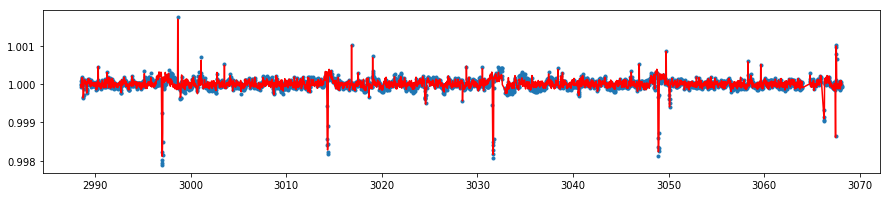

In [11]:
from scipy.interpolate import Rbf

f_d2=f_d/rbfi(t)
fig, ax = pl.subplots(1,1,figsize=(15,3))
ax.plot(t, f_d, '.')
ax.plot(t, f_d2, 'r-')

In [12]:
from gatspy.periodic import LombScargleFast

model = LombScargleFast().fit(t, f_d)
periods, power = model.periodogram_auto(nyquist_factor=100)

In [13]:
periods[periods > 1][np.argmax(power[periods > 1])]

2.1630982427717282

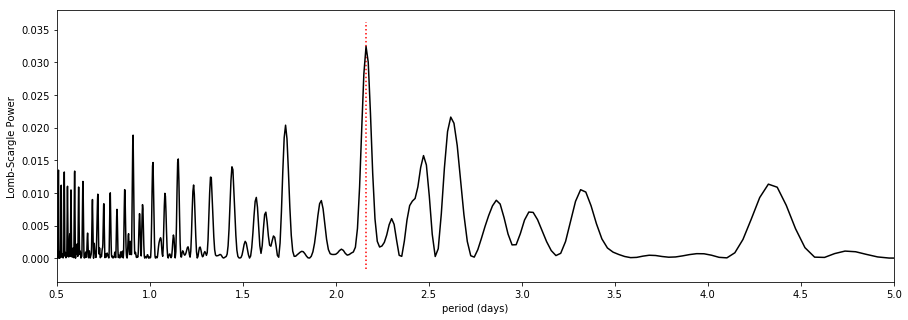

In [14]:
#get positive periods
idx1 = periods > 1
#
idx2 = np.argmax(power[idx1])
peak = periods[idx1][idx2]

fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(periods, power, 'k-')
ax.set(xlim=(0.5, 5),
#         , ylim=(0, 0.01),
   xlabel='period (days)',
   ylabel='Lomb-Scargle Power')
ax.vlines(peak, *ax.get_ylim(), linestyles='dotted', colors='r')

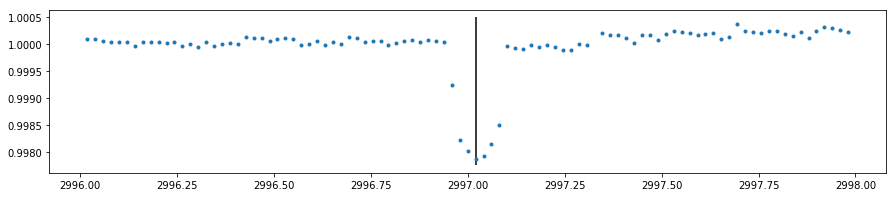

In [15]:
idx = (2996 < t) & (t < 2998)
tsub, fsub = t[idx], f_d[idx]
idx = fsub < np.median(fsub) - 0.5 * np.std(fsub)
t0 = np.median(tsub[idx])

fig, ax = pl.subplots(1,1,figsize=(15,3))
ax.plot(tsub, fsub, '.')
ax.vlines(t0, *ax.get_ylim())

In [16]:
#import simfit
#tf, ff = simfit.util.fold(t, f, peak, t0)

def get_tns(t, p, t0):

    idx = t != 0
    t = t[idx]

    while t0-p > t.min():
        t0 -= p
    if t0 < t.min():
        t0 += p

    tns = [t0+p*i for i in range(int((t.max()-t0)/p+1))]

    while tns[-1] > t.max():
        tns.pop()

    while tns[0] < t.min():
        tns = tns[1:]

    return tns

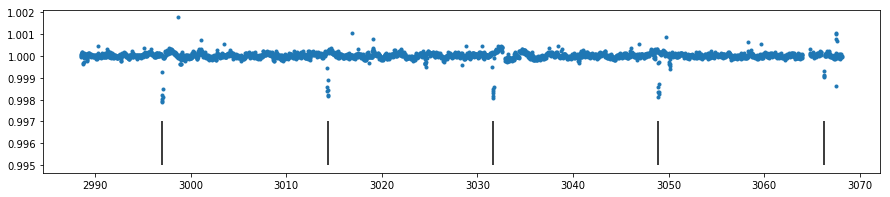

In [17]:
p1=peak*8
tns=get_tns(t, p1, t0)

fig, ax = pl.subplots(1,1,figsize=(15,3))
ax.plot(t, f_d, '.')
ax.vlines(tns, 0.995, 0.997)

## Fold

In [18]:
def fold(t, f, p, t0, width=0.4, clip=False, bl=False, t14=0.2):
    tns = get_tns(t, p, t0)
    tf, ff = np.empty(0), np.empty(0)
    for i,tn in enumerate(tns):
        idx = (t > tn - width/2.) & (t < tn + width/2.)
        ti = t[idx]-tn
        fi = f[idx]
        fi /= np.nanmedian(fi)
        if bl:
            idx = (ti < -t14/2.) | (ti > t14/2.)
            assert np.isfinite(ti[idx]).all() & np.isfinite(fi[idx]).all()
            assert idx.sum() > 0
            try:
                res = sm.RLM(fi[idx], sm.add_constant(ti[idx])).fit()
                if np.abs(res.params[1]) > 1e-2:
                    print('bad data probably causing poor fit')
                    print('transit {} baseline params: {}'.format(i, res.params))
                    continue
                model = res.params[0] + res.params[1] * ti
                fi = fi - model + 1
            except:
                print("error computing baseline for transit {}".format(i))
                print("num. points: {}".format(idx.sum()))
                print(ti)
        tf = np.append(tf, ti)
        ff = np.append(ff, fi / np.nanmedian(fi))
    idx = np.argsort(tf)
    tf = tf[idx]
    ff = ff[idx]
    if clip:
        fc = sigma_clip(ff, sigma_lower=10, sigma_upper=2)
        tf, ff = tf[~fc.mask], ff[~fc.mask]
    return tf, ff

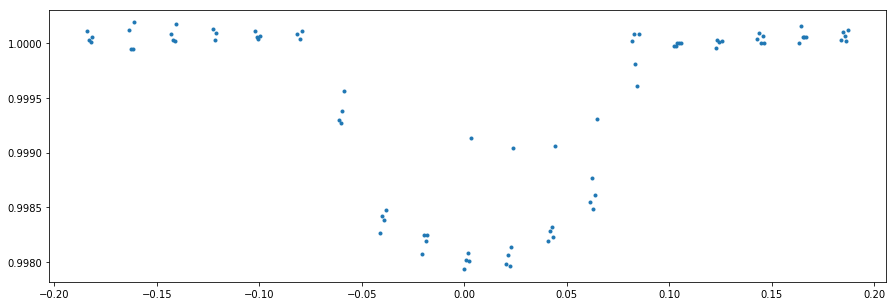

In [19]:
tf1, ff1 = fold(t, f_d, p1, t0)
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(tf1, ff1, '.')

## remove first period transits

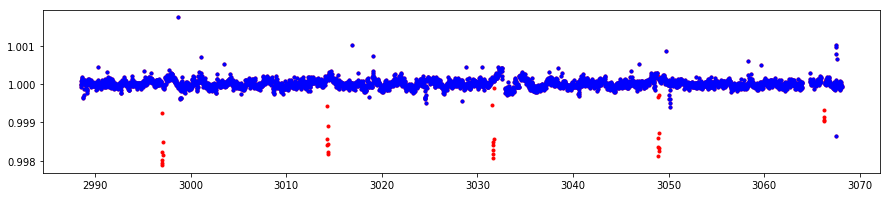

In [20]:
#get out of transit lc

intransit = np.zeros_like(t).astype(bool)
t14=0.2

for tn in tns:
    idx = (t > tn - t14/2.) & (t < tn + t14/2.)
    intransit = np.logical_or(intransit, idx)
    
fig, ax = pl.subplots(1,1,figsize=(15,3))
ax.plot(t, f_d, 'r.')
t_oot1,f_oot1=t[~intransit] ,f_d[~intransit] 
ax.plot(t_oot1,f_oot1, 'b.')

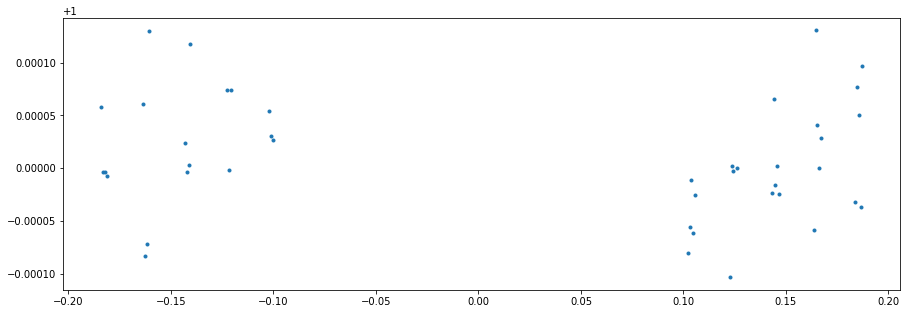

In [21]:
tf1b, ff1b = fold(t_oot1, f_oot1, p1, t0)
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(tf1b, ff1b, '.')

Now, transit is gone.

## Check other periods

In [22]:
from gatspy.periodic import LombScargleFast

model = LombScargleFast().fit(t_oot1, f_oot1)
periods, power = model.periodogram_auto(nyquist_factor=100)

periods[periods > 1][np.argmax(power[periods > 1])]

3.4017955270939999

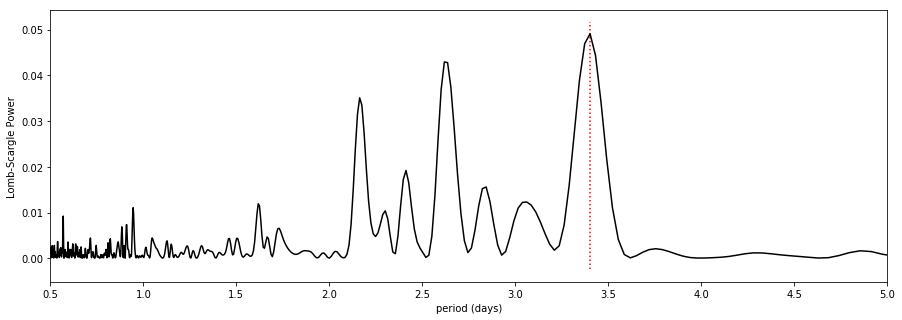

In [23]:
#get positive periods
idx1 = periods > 1
#
idx2 = np.argmax(power[idx1])
peak = periods[idx1][idx2]

fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(periods, power, 'k-')
ax.set(xlim=(0.5, 5),
#         , ylim=(0, 0.01),
   xlabel='period (days)',
   ylabel='Lomb-Scargle Power')
ax.vlines(peak, *ax.get_ylim(), linestyles='dotted', colors='r')

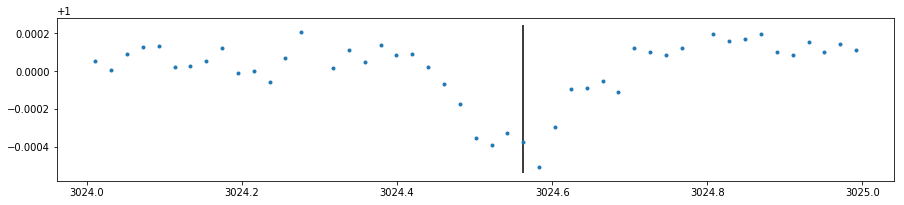

In [24]:
idx = (3024 < t) & (t < 3025)
tsub, fsub = t_oot1[idx], f_oot1[idx]
idx = fsub < np.median(fsub) - 0.5 * np.std(fsub)
t0 = np.median(tsub[idx])

fig, ax = pl.subplots(1,1,figsize=(15,3))
ax.plot(tsub, fsub, '.')
ax.vlines(t0, *ax.get_ylim())

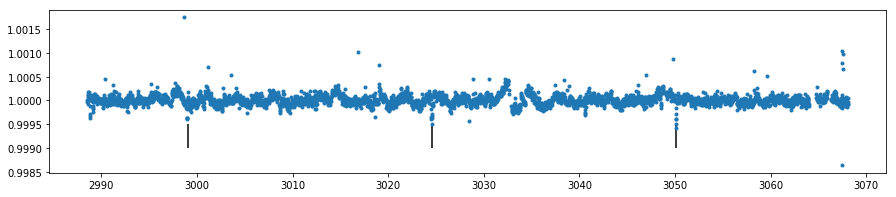

In [25]:
p2 = peak * 8
tns=get_tns(t_oot1, p2, t0)

offset=peak/2
tns2 = np.array([tns[0]+offset, tns[1], tns[2]-offset])

fig, ax = pl.subplots(1,1,figsize=(15,3))
ax.plot(t_oot1, f_oot1, '.')
ax.vlines(tns2, 0.999, 0.9995)

In [28]:
tns2[1]-tns2[0]

25.513466453205183

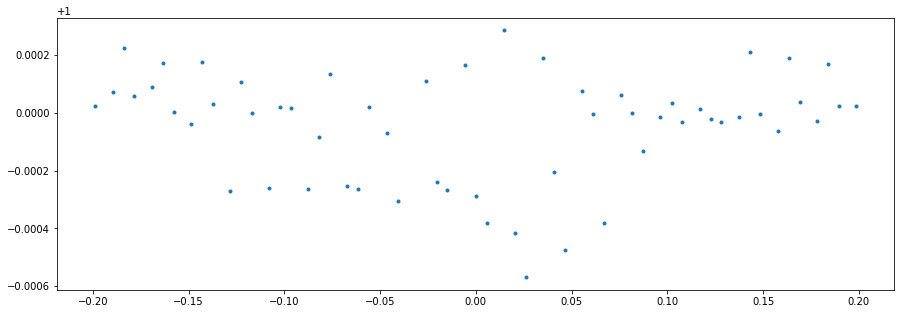

In [30]:
tf2, ff2 = fold(t_oot1, f_oot1, tns2[2]-tns[1], t0)
fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(tf2, ff2, '.')

## remove second period transits

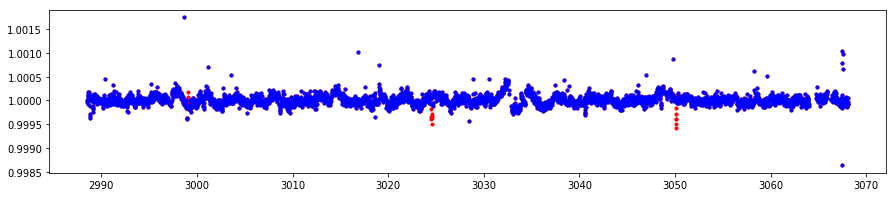

In [30]:
#get out of transit lc

intransit = np.zeros_like(t).astype(bool)
t14=0.2

for tn in tns2:
    idx = (t > tn - t14/2.) & (t < tn + t14/2.)
    intransit = np.logical_or(intransit, idx)
    
fig, ax = pl.subplots(1,1,figsize=(15,3))
ax.plot(t_oot1, f_oot1, 'r.')
t_oot2,f_oot2=t_oot1[~intransit] ,f_oot1[~intransit]
ax.plot(t_oot2,f_oot2, 'b.')